In [1]:
import pandas as pd
df=pd.read_excel("/content/watchtime_data.xlsx")
df

,Watch Time,Language,Age
0,1.5,English,12
1,1.0,English,13
2,1.5,Hindi,11
3,1.5,Hindi,15
4,2.0,English,12
5,2.5,Hindi,13
6,3.0,Hindi,12
7,4.0,English,11
8,2.0,English,15
9,6.0,English,12


In [2]:
df["Watch Time"].mean()#sum of obs/to obs

np.float64(2.5)

In [3]:
df["Watch Time"].median()

2.0

In [4]:
df["Watch Time"].mode()

,Watch Time
0,1.5


In [5]:
import seaborn as sns

<Axes: xlabel='Watch Time', ylabel='Count'>

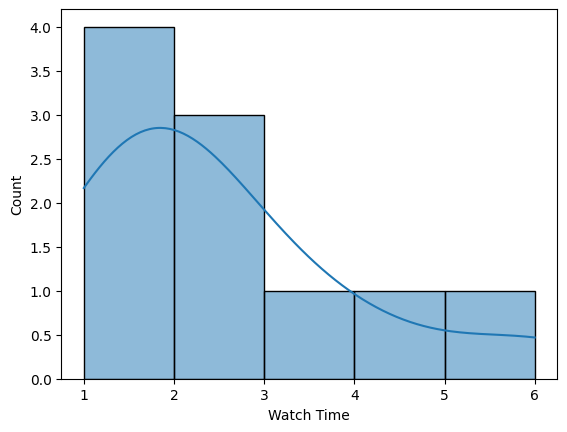

In [6]:
sns.histplot(df["Watch Time"],kde=True)

In [7]:
df["Language"].mode()

,Language
0,English


In [8]:
#10 ,20,30   mean=20

#0,20,40   mean=20

#measures of dispersion
#s.d,variance,range

In [9]:
df["Watch Time"].max()

6.0

In [10]:
df["Watch Time"].min()

1.0

In [11]:
import numpy as np

In [12]:
std=np.std(df["Watch Time"])
std

1.4317821063276353

In [13]:
var=np.var(df['Watch Time'])
var

2.05

In [14]:
#skewed---outlier

<Axes: ylabel='Watch Time'>

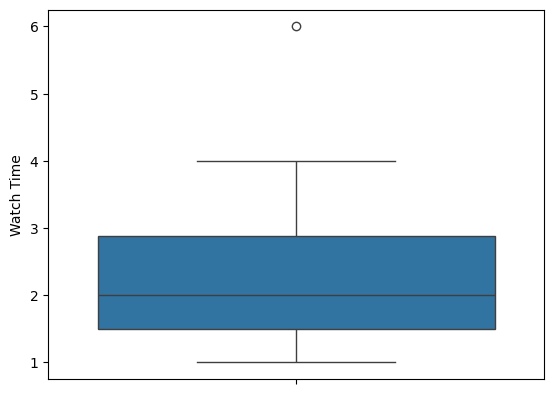

In [15]:
sns.boxplot(df['Watch Time'])

In [16]:
from scipy.stats import skew

In [17]:
skew(df["Watch Time"])#-0.5      0.5

np.float64(1.3542733783824752)

In [18]:
df.columns

Index(['Watch Time', 'Language', 'Age'], dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

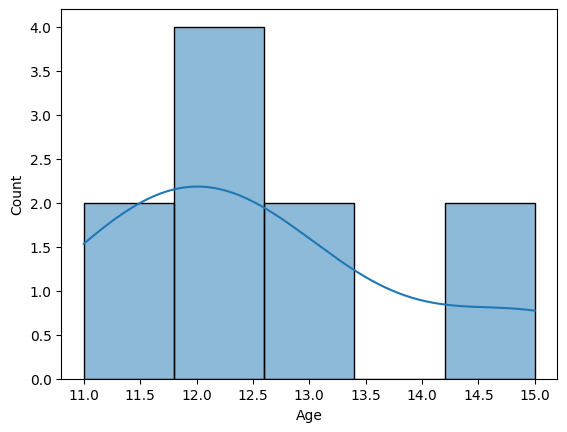

In [19]:
sns.histplot(df["Age"],kde=True)

In [20]:
skew(df["Age"])

np.float64(0.7500308204401297)

In [21]:
#iqr
data=[5,7,8,12,13,14,18,21,23]
q1=np.percentile(data,25)
q1

np.float64(8.0)

In [22]:
q3=np.percentile(data,75)
q3

np.float64(18.0)

In [23]:
q2=np.percentile(data,50)#13
q2

np.float64(13.0)

In [24]:
iqr=q3-q1
iqr

np.float64(10.0)

In [32]:
lower_fence=q1-(1.5*iqr)
print(lower_fence)

-7.0


In [31]:
upper_fence=q3+(1.5*iqr)
print(upper_fence)

33.0


In [34]:
data=pd.Series(data)

In [35]:
outliers=data[(data<lower_fence) | (data>upper_fence)]
outliers

,0


In [36]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [37]:
df.skew(numeric_only=True)

,0
sepal_length,0.314911
sepal_width,0.318966
petal_length,-0.274884
petal_width,-0.102967


<Axes: xlabel='sepal_length', ylabel='Count'>

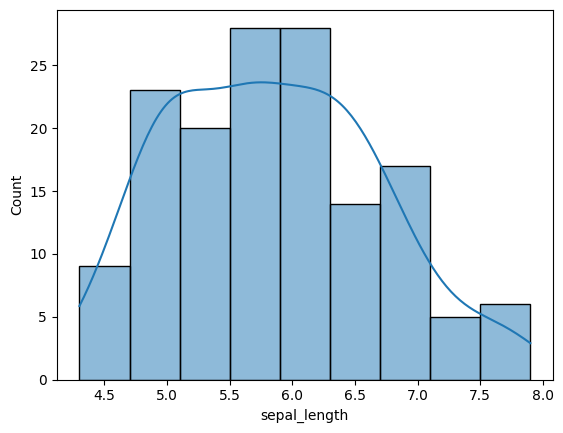

In [38]:
sns.histplot(df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

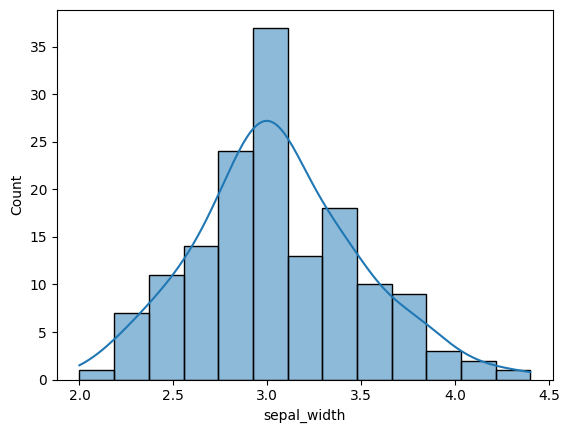

In [39]:
sns.histplot(df["sepal_width"],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

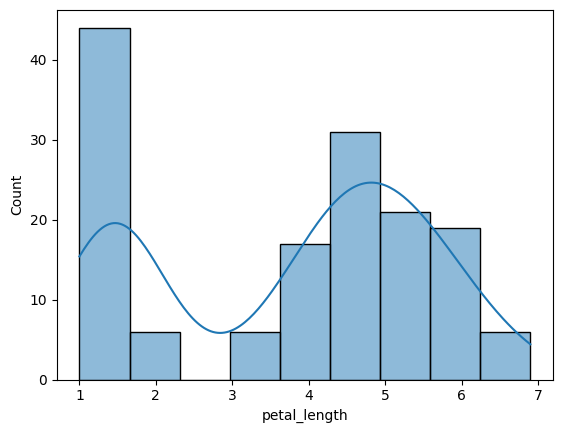

In [40]:
sns.histplot(df["petal_length"],kde=True)

(array([30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

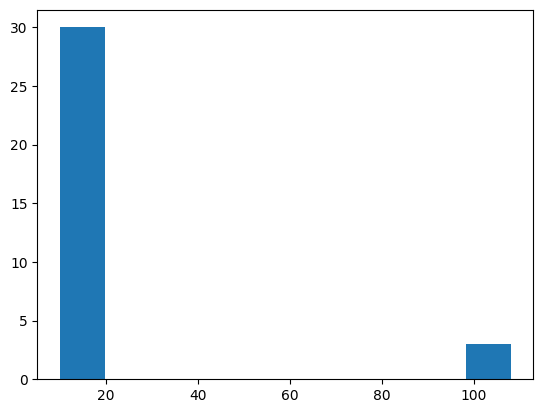

In [41]:
data=[11,10,12,13,15,14,102,13,14,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
import matplotlib.pyplot as plt
plt.hist(data)

In [42]:
#z-score
outliers=[]
def detect_outlier(data1):
  threshold=3#standard value for threshold is 3,bcz in a normal distribution 99.7 % data values lie within +-3 deviations.
  #set threshold=2.5 if you want catch more anomalies.
  mean=np.mean(data1)
  std=np.std(data1)
  print(mean)
  print(std)
  for i in data1:
    z_score=(i-mean)/std
    print(z_score)
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers



In [43]:
detect_outlier(data)

21.393939393939394
26.736581901093917
-0.3887534851085108
-0.4261554239090381
-0.35135154630798354
-0.31394960750745626
-0.23914572990640173
-0.276547668706929
3.0148229457394717
-0.31394960750745626
-0.276547668706929
-0.35135154630798354
-0.276547668706929
-0.16434185230534715
-0.0895379747042926
3.201832639742108
-0.4261554239090381
-0.31394960750745626
-0.35135154630798354
-0.276547668706929
-0.35135154630798354
3.2392345785426353
-0.35135154630798354
-0.3887534851085108
-0.276547668706929
-0.31394960750745626
-0.23914572990640173
-0.4261554239090381
-0.23914572990640173
-0.35135154630798354
-0.4261554239090381
-0.276547668706929
-0.31394960750745626
-0.23914572990640173
-0.4261554239090381


[102, 107, 108]

In [44]:
data=sorted(data)
data

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [46]:
q1,q2,q3=np.percentile(data,[25,50,75])
print(q1,q2,q3)

12.0 13.0 15.0


In [47]:
iqr=q3-q1
iqr

np.float64(3.0)

In [48]:
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)

In [49]:
print(lower_fence,upper_fence)

7.5 19.5


In [50]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: >

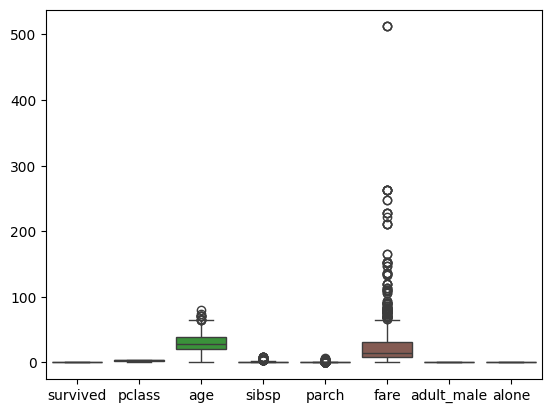

In [51]:
sns.boxplot(df)

<Axes: ylabel='fare'>

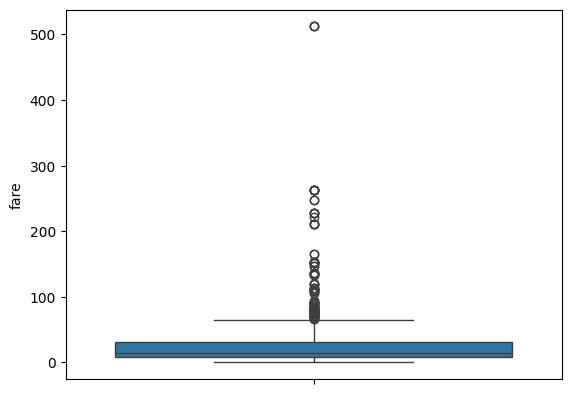

In [52]:
sns.boxplot(df["fare"])

In [53]:
q1,q2,q3=np.percentile(df["fare"],[25,50,75])

In [54]:
iqr=q3-q1
iqr

np.float64(23.0896)

In [55]:
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)

In [56]:
lower_fence,upper_fence

(np.float64(-26.724), np.float64(65.6344))

In [57]:
np.where(df["fare"]<lower_fence)

(array([], dtype=int64),)

In [58]:
np.where(df["fare"]>upper_fence)

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]),)

In [59]:
df["fare"][1]

np.float64(71.2833)

In [60]:
df["fare"][879]

np.float64(83.1583)

In [61]:
#caping,winsorization,replace